In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Define a simple model
def create_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(1000,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Create a mirrored strategy
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])

print(f"Number of devices: {strategy.num_replicas_in_sync}")

# Open a strategy scope
with strategy.scope():
    # Create a model
    model = create_model()
    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Generate some dummy data
x_train = np.random.random((1000, 1000))
y_train = np.random.randint(10, size=(1000,10))
x_test = np.random.random((100, 1000))
y_test = np.random.randint(10, size=(100,10))

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
predictions = model.predict(x_test)
predictions.shape

Number of devices: 2
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1841 - loss: 463.4850
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1712 - loss: 4384.3560
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2016 - loss: 15934.7012
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1247 - loss: 37775.8555
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1170 - loss: 71615.0781
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


(4,)

In [6]:
x_test.shape

(100, 1000)

In [ ]:
x_test

In [ ]:
#remove training logs
import shutil

# Specify the path to the directory
directory_path = '/kaggle/working/Logs'

# Remove the directory and its contents
shutil.rmtree(directory_path)


In [6]:
epochs=150
batch_size=1024
window_length = 640  # For example, use a window length of 10
num_features=3
number_of_features=3
model_name="LSTM-AttenionBlock-3features-3classes"
num_classes=2
patience=15
class_names3 = {
    0: 'Normal',
    1: 'Medium',
    2: 'High'
}
class_names2 = {
    0: 'Normal',
    1: 'High'
}

In [13]:
import pandas as pd 
df = pd.read_csv("/kaggle/input/nurse-stress-prediction-wearable-sensors/merged_data.csv")
df

KeyboardInterrupt: 

In [ ]:
# Assuming your DataFrame is df and the column is 'ID'
# Convert integer values to strings
df['id'] = df['id'].astype(str)
# Assuming df is your DataFrame
df['label'] = df['label'].replace(1, 0) # for binary classification

# Print the DataFrame to verify the conversion
print(df)


In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Count the number of samples for each ID and label
id_label_counts = df.groupby(['id', 'label']).size().unstack(fill_value=0)

# Plot the grouped bar graph
plt.figure(figsize=(12, 6))
id_label_counts.plot(kind='bar', stacked=True)
plt.xlabel('ID')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples for Each ID Across All Labels')
# 3 classes
count = len(set(df['label']))
print(count)
if count==3:
    plt.legend(title='Label', labels=['Normal','Medium','High'])
# 2 classes
else:
    plt.legend(title='Label', labels=['Normal','High'])
plt.show()

testing_ids = ['7E', '8B','E4']
val_ids=['94','CE']

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


def visualize_class_distribution(df, label_column):
    # Map class labels to categories
    label_mapping = {0: 'Normal', 1: 'Medium', 2: 'High'}
    df['category'] = df[label_column].map(label_mapping)

    # Calculate class counts
    class_counts = df['category'].value_counts()

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.pie(class_counts, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Dataset Class Distribution')
    plt.legend(title='Stress Level', loc='upper right', labels=class_counts.index)
    plt.show()

In [ ]:
visualize_class_distribution(df, 'label')

In [ ]:
df= df.drop(columns=['category'],axis=1)

In [ ]:
df1=df[['X','Y','Z','datetime','id','label']]
df2=df[['EDA','HR','TEMP','datetime','id','label']]

In [ ]:
#testing data
all_ids = set(df['id'])
exclude_ids = set(testing_ids + val_ids)
train_ids = list(all_ids - exclude_ids)

# Filter the DataFrame based on the specified ID values
Testing_data1 = df[df['id'].isin(testing_ids)]
val_data1 = df[df['id'].isin(val_ids)]
train_data1 = df[df['id'].isin(train_ids)]

Testing_data2 = df2[df2['id'].isin(testing_ids)]
val_data2 = df2[df2['id'].isin(val_ids)]
train_data2 = df2[df2['id'].isin(train_ids)]

del all_ids,val_ids,testing_ids,train_ids

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def encode_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    encoded_labels= to_categorical(encoded_labels)
    return encoded_labels

In [ ]:
import numpy as np

def apply_sliding_windowing_new(df, window_length, num_features, overlap=0.3, ftrs=['X', 'Y', 'Z']):
    # Sort the values by 'id' and 'datetime' columns
    df_sorted = df.sort_values(by=['id', 'datetime'])
#     print(df_sorted)
    # Initialize arrays to store reshaped data and labels
    reshaped_data = []
    labels = []

    # Set the initial start index
    start_idx = 0

    while start_idx + window_length <= len(df_sorted):
        # Set the end index for the current window
        end_idx = start_idx + window_length

        # Create a subset of the DataFrame for the current window
        subset_df = df_sorted.iloc[start_idx:end_idx]

        # Extract features from the subset DataFrame and convert to numpy array
        subset_features = subset_df[ftrs].values
        reshaped_data.append(subset_features)

        # Extract label for the current window and encode it
        label = subset_df['label'].iloc[0]  # Assuming the label is the same for all rows in the window
        labels.append(label)

        # Update the start index for the next window
        start_idx = end_idx - int(window_length * (1 - overlap))

    # Convert the list of arrays to a single numpy array
    reshaped_data = np.array(reshaped_data)

    # Encode labels
    labels_encoded = encode_labels(np.array(labels))

    return reshaped_data, labels_encoded

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def apply_minmax_scaling(df,features=['X', 'Y', 'Z']):
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Apply MinMaxScaler to 'x', 'y', 'z' columns
    df[features] = scaler.fit_transform(df[features])

    return df

# Example usage
# Assuming df is your DataFrame
# df_normalized = apply_minmax_scaling(df)


In [ ]:
train_data1

In [ ]:
features1 = ['X', 'Y', 'Z']
train_data1 = apply_minmax_scaling(train_data1,features=features1)
Testing_data1 = apply_minmax_scaling(Testing_data1,features=features1)
val_data1 = apply_minmax_scaling(val_data1,features=features1)

features2 = ['EDA','HR','TEMP']
train_data2 = apply_minmax_scaling(train_data2,features=features2)
Testing_data2 = apply_minmax_scaling(Testing_data2,features=features2)
val_data2 = apply_minmax_scaling(val_data2,features=features2)

In [ ]:
window_length

In [ ]:
val_data1

In [ ]:
print("Processing x_Val1...")
x_val1, y_val1 = apply_sliding_windowing_new(val_data1, window_length, num_features,overlap=0.5,ftrs=features1)

print("Processing x_test1...")
x_test1, y_test1 = apply_sliding_windowing_new(Testing_data1, window_length, num_features,overlap=0.5,ftrs=features1)

print("Processing x_train1...")
x_train1, y_train1 = apply_sliding_windowing_new(train_data1, window_length, num_features,overlap=0.5,ftrs=features1)


In [ ]:
print("Processing x_Val2...")
x_val2, y_val2 = apply_sliding_windowing_new(val_data2, window_length, num_features,overlap=0.5,ftrs=features2)

print("Processing x_test2...")
x_test2, y_test2 = apply_sliding_windowing_new(Testing_data2, window_length, num_features,overlap=0.5,ftrs=features2)

print("Processing x_train2...")
x_train2, y_train2 = apply_sliding_windowing_new(train_data2, window_length, num_features,overlap=0.5,ftrs=features2)


In [ ]:
print(x_train1.shape)  # Check the shape of the reshaped data
print(x_test1.shape)  # Check the shape of the reshaped data
print(x_val1.shape)  # Check the shape of the reshaped data
print(y_train1.shape)  # Check the shape of the reshaped data
print(y_test1.shape)  # Check the shape of the reshaped data
print(y_val1.shape)  # Check the shape of the reshaped data

In [ ]:
print(x_train2.shape)  # Check the shape of the reshaped data
print(x_test2.shape)  # Check the shape of the reshaped data
print(x_val2.shape)  # Check the shape of the reshaped data
print(y_train2.shape)  # Check the shape of the reshaped data
print(y_test2.shape)  # Check the shape of the reshaped data
print(y_val2.shape)  # Check the shape of the reshaped data

In [3]:
import os
import numpy as np

def save_numpy_to_directory(numpy_array, directory, file_name):
    # Create the directory if it doesn't exist
    os.makedirs(directory, exist_ok=True)
    
    # Save the NumPy array to the specified directory
    file_path = os.path.join(directory, file_name)
    np.save(file_path, numpy_array)

In [4]:
directory_path="/kaggle/working"
file_name = "x_train1.npy"
save_numpy_to_directory(x_train1, directory_path, file_name)

file_name = "y_train1.npy"
save_numpy_to_directory(y_train1, directory_path, file_name)

file_name = "x_test1.npy"
save_numpy_to_directory(x_test1, directory_path, file_name)

file_name = "y_test1.npy"
save_numpy_to_directory(y_test1, directory_path, file_name)

file_name = "x_val1.npy"
save_numpy_to_directory(x_val1, directory_path, file_name)

file_name = "y_val1.npy"
save_numpy_to_directory(y_val1, directory_path, file_name)


NameError: name 'x_train1' is not defined

In [ ]:
directory_path="/kaggle/working"
file_name = "x_train2.npy"
save_numpy_to_directory(x_train2, directory_path, file_name)

file_name = "y_train2.npy"
save_numpy_to_directory(y_train2, directory_path, file_name)

file_name = "x_test2.npy"
save_numpy_to_directory(x_test2, directory_path, file_name)

file_name = "y_test2.npy"
save_numpy_to_directory(y_test2, directory_path, file_name)

file_name = "x_val2.npy"
save_numpy_to_directory(x_val2, directory_path, file_name)

file_name = "y_val2.npy"
save_numpy_to_directory(y_val2, directory_path, file_name)


In [7]:
import numpy as np

def load_numpy_from_file(file_path):
    # Load the NumPy array from the specified file path
    numpy_array = np.load(file_path)
    return numpy_array



In [8]:
# Example usage
file_path = "/kaggle/working/x_train1.npy"
x_train1 = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/y_train1.npy"
y_train1 = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/x_test1.npy"
x_test1 = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/y_test1.npy"
y_test1 = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/x_val1.npy"
x_val1 = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/y_val1.npy"
y_val1 = load_numpy_from_file(file_path)


In [9]:
# Example usage
file_path = "/kaggle/working/x_train2.npy"
x_train2 = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/y_train2.npy"
y_train2 = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/x_test2.npy"
x_test2 = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/y_test2.npy"
y_test2 = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/x_val2.npy"
x_val2 = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/y_val2.npy"
y_val2 = load_numpy_from_file(file_path)


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Concatenate,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.utils import plot_model

2024-04-25 22:35:21.715668: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 22:35:21.715799: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 22:35:21.845671: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.2):
    # Normalization and Attention
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = tf.keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = tf.keras.layers.Dropout(rate=dropout)(x)
    x = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [62]:
import tensorflow as tf
from keras.metrics import Recall
from keras.layers import LSTM, Dense, Dropout, Flatten, Input, concatenate
from tensorflow.keras.optimizers import Adam

def create_dual_model_with_attention_block(
    num_classes,
    window_length,
    number_of_features, 
    head_size=256,
    num_heads=4,
    ff_dim=256,
    num_transformer_blocks=4,
    dense_layers=3,
    lstm_units=256,
    dropout=0.2,
    mlp_dropout=0,
    lstm_dropout=0,
    dense_units=256
):
    # Define the model inside the strategy's scope
#     strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])  # Utilize two GPUs
    with strategy.scope():
        input_shape=(window_length, number_of_features)
        input_sensor = Input(shape=input_shape, name='input_sensor')
        input_readings = Input(shape=input_shape, name='input_readings')
        inputs= [input_sensor,input_readings]
        branch1=input_sensor
        for _ in range(num_transformer_blocks):
            branch1 = transformer_encoder(branch1, head_size, num_heads, ff_dim, dropout)

        transformer_features = tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")(branch1)

        branch2 = LSTM(lstm_units, return_sequences=True, name='lstm_sensor_1')(input_readings)
        branch2 = LSTM(int(lstm_units/2), name='lstm_sensor_2')(branch2)
        lstm_features = Flatten(name='flatten_sensor')(branch2)


        x = Concatenate()([transformer_features, lstm_features])

        for _ in range(dense_layers):
            x = Dense(dense_units, activation="relu")(x)
            x = Dropout(mlp_dropout)(x)
            dense_units= int(dense_units/2)

        output_layer = tf.keras.layers.Dense(num_classes, activation="softmax")(x)  # Softmax for multi-class classification
        
        model = tf.keras.Model(inputs=[input_sensor, input_readings], outputs=output_layer, name='dual_model')

        # Compile the model
        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=[Recall()])


    return model

Model: "dual_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_sensor        │ (None, 640, 3)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 640, 3)    │          6 │ input_sensor[0][… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 640, 3)    │     15,363 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_45          │ (None, 640, 3)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, 640, 3)    │          0 │ dropout_45[0][0], │
│                     │                   │            │ input_sensor[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 640, 3)    │          6 │ add_24[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_24 (Conv1D)  │ (None, 640, 256)  │      1,024 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_46          │ (None, 640, 256)  │          0 │ conv1d_24[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_25 (Conv1D)  │ (None, 640, 3)    │        771 │ dropout_46[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_25 (Add)        │ (None, 640, 3)    │          0 │ conv1d_25[0][0],  │
│                     │                   │            │ add_24[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 640, 3)    │          6 │ add_25[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 640, 3)    │     15,363 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_48          │ (None, 640, 3)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_26 (Add)        │ (None, 640, 3)    │          0 │ dropout_48[0][0], │
│                     │                   │            │ add_25[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 640, 3)    │          6 │ add_26[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_26 (Conv1D)  │ (None, 640, 256)  │      1,024 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_49          │ (None, 640, 256)  │          0 │ conv1d_26[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_readings      │ (None, 640, 3)    │          0 │ -               

 Total params: 727,718 (2.78 MB)

 Trainable params: 727,718 (2.78 MB)

 Non-trainable params: 0 (0.00 B)

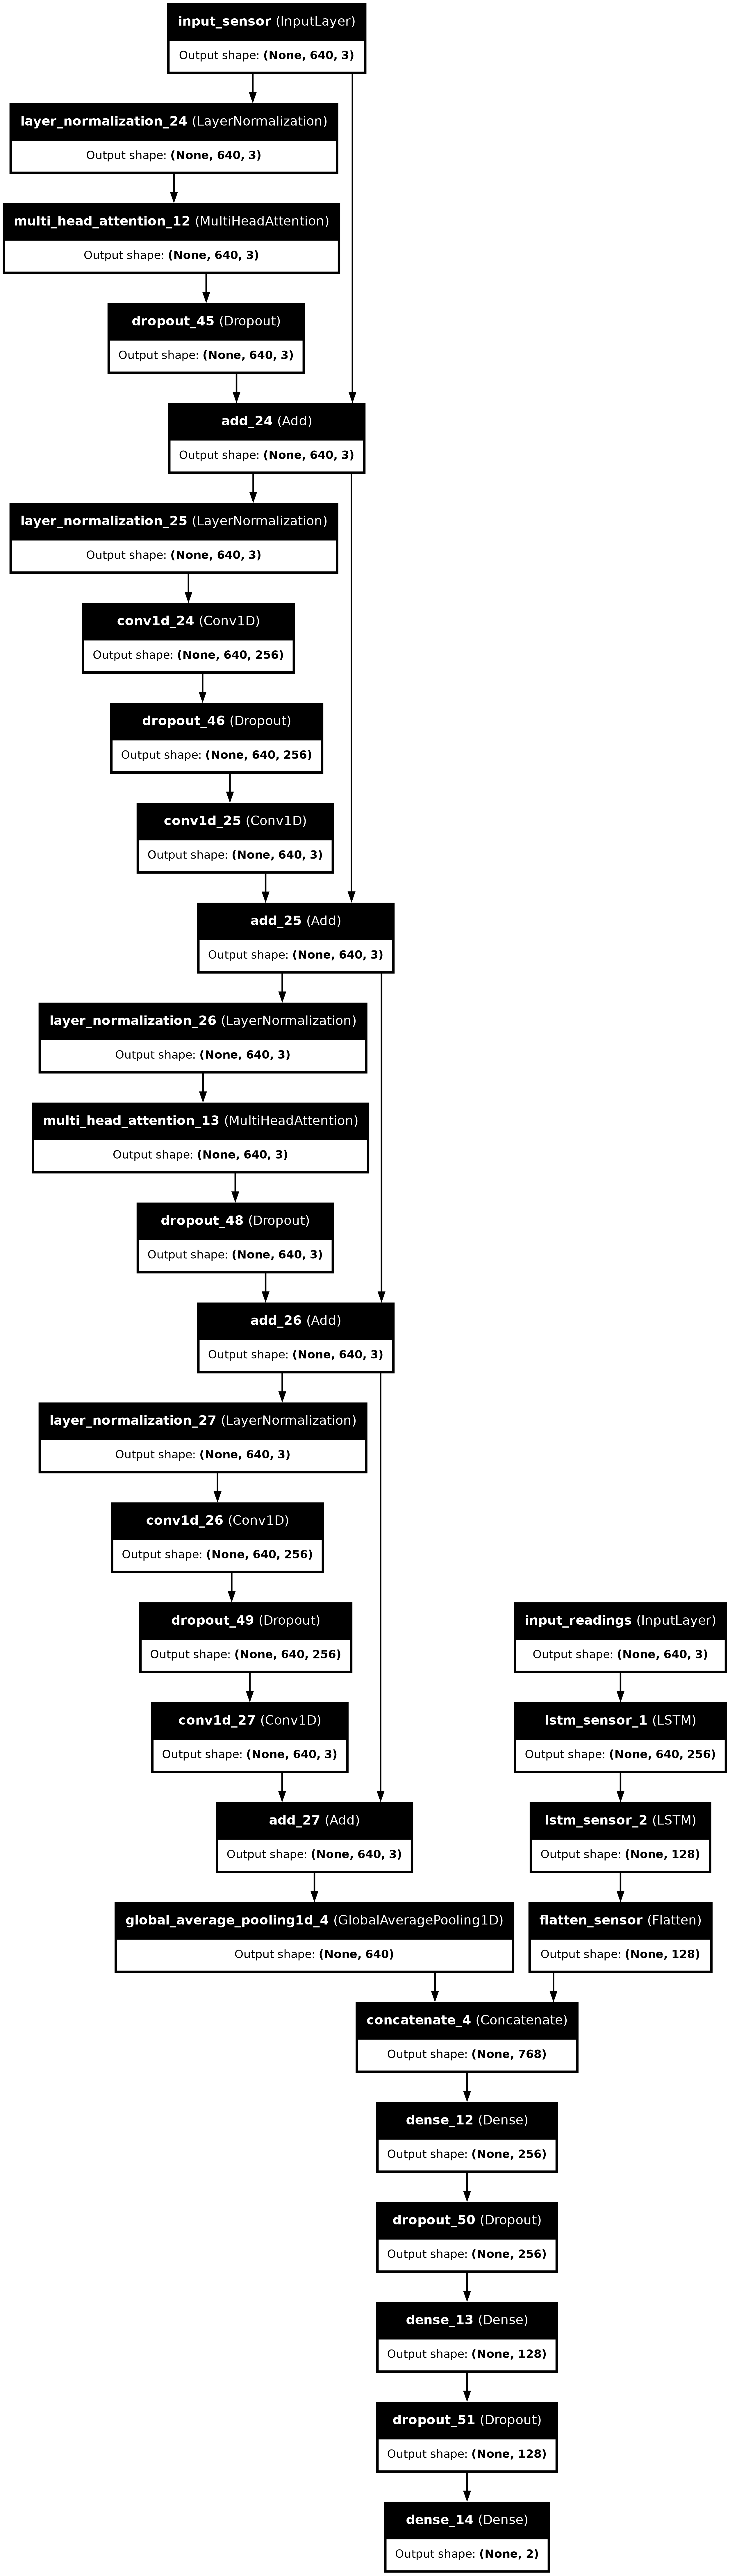

In [60]:
model = create_dual_model_with_attention_block(num_classes,window_length, number_of_features,dense_layers=2,num_transformer_blocks=2)

# Display the model summary
model.summary()
plot_model(model, to_file=model_name+"_arc_old.png", show_shapes=True, show_layer_names=True)


In [23]:
# # Build and compile the model
# model = create_dual_model_with_attention_block(num_classes,window_length, number_of_features,dense_layers=2)

# # Display the model summary
# model.summary()
# plot_model(model, to_file=model_name+"_arc.png", show_shapes=True, show_layer_names=True)


In [24]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, CSVLogger
import os
def addCallbacks(model_name):
    cllbks = []
    # Define the callback
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',  # You can use 'val_accuracy' or other metrics
        factor=0.1,           # Factor by which the learning rate will be reduced. new_lr = lr * factor
        patience=5,           # Number of epochs with no improvement after which learning rate will be reduced
        min_lr=1e-6,          # Lower bound on the learning rate
        verbose=1
    )
    cllbks.append(reduce_lr)
    # Define the EarlyStopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Metric to monitor (e.g., validation loss)
        patience=patience,   # Number of epochs with no improvement before stopping
        verbose=1,           # Verbosity level (1 for updates, 0 for silent)
        restore_best_weights=True  # Restore model weights to the best observed during training
    )
    cllbks.append(early_stopping)
    log_dir = "Logs/" + model_name
    if not os.path.exists(log_dir):
        os.makedirs(log_dir)
    csv_logger_callback = CSVLogger(log_dir + '/logs.csv')
    cllbks.append(csv_logger_callback)
    # log_dir = save_folder + "Logs/" + model_name
    # tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
    # # cllbks.append(tensorboard_callback)
    return cllbks
# callbacks=addCallbacks()

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

def testModel(mdl, X_test1, X_test2, y_test):
    with strategy.scope():

        # Predictions from the model
        y_pred = mdl.predict([X_test1, X_test2])

        # Convert predictions to class labels
        y_pred_labels = np.argmax(y_pred, axis=1)
        y_test_labels = np.argmax(y_test, axis=1)

        # Calculate metrics
        accuracy = accuracy_score(y_test_labels, y_pred_labels)
        precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
        recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
        f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
    #     auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

        report = classification_report(y_test_labels, y_pred_labels)

        # Confusion matrix
        conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print(report)
    #     print("AUC:", auc)
        print("Confusion Matrix:\n", conf_matrix)

    return conf_matrix, accuracy, precision, recall, f1

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(confusion_matrix, class_names=None, save_path=None):
    """
    Plot a confusion matrix as a heatmap.

    Parameters:
    - confusion_matrix (numpy.ndarray): Confusion matrix.
    - class_names (dict): Dictionary mapping class numbers to class names.
    - save_path (str): Path to save the heatmap plot. If None, the plot is displayed but not saved.

    Returns:
    - None
    """
    plt.figure(figsize=(8, 6))

    # Using Seaborn heatmap
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[class_names[i] for i in range(confusion_matrix.shape[0])] if class_names else None,
                yticklabels=[class_names[i] for i in range(confusion_matrix.shape[1])] if class_names else None)

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    if save_path is not None:
        plt.savefig(save_path)
    else:
        plt.show()

# Example usage:
# Assuming you have a confusion matrix named 'conf_matrix'
# and a class_names dictionary mapping class numbers to class names
# and you want to save the heatmap to a file named 'confusion_matrix_heatmap.png'
# plot_confusion_matrix(conf_matrix, class_names=class_names, save_path='confusion_matrix_heatmap_extracted.png')


In [27]:
import pandas as pd

def append_to_csv(file_path, model_name, accuracy, precision, recall, f1_score):
    """
    Append a row with evaluation metrics to an existing CSV file.

    Parameters:
    - file_path: The path to the CSV file.
    - model_name: Name of the model.
    - accuracy: Accuracy value.
    - precision: Precision value.
    - recall: Recall value.
    - f1_score: F1 score value.
    - testing_time: Time taken for testing in seconds.
    - training_time: Time taken for training in seconds.
    """

    headers = ['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1-Score']

    # Check if the file exists
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        # If the file doesn't exist, create a new one with headers
        df = pd.DataFrame(columns=headers)

    # Append a new row with the specified values
    new_row = pd.DataFrame([[model_name, accuracy, precision, recall, f1_score]], columns=headers)
    df = pd.concat([df, new_row], ignore_index=True)

    # Save to the same CSV file
    df.to_csv(file_path, index=False)

    print(f"Row appended to '{file_path}' successfully.")

# Example usage:
# csv_file_path = "evaluation_metrics.csv"
# append_to_csv(csv_file_path, "ExampleModel", 0.85, 0.88, 0.82, 0.85, 30, 120)


In [28]:
# del model

In [64]:
import time

strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])  # Utilize two GPUs
with strategy.scope():
    model = create_dual_model_with_attention_block(num_classes,window_length, number_of_features,dense_layers=2,num_transformer_blocks=2)
    callb=addCallbacks(model_name)
    start_time = time.time()
    history = model.fit([x_train1,x_train2],y_train1, epochs=1, validation_data=([x_val1,x_val2], y_val2),batch_size = int(batch_size/4),callbacks=callb)
    end_time = time.time()
    durationt = end_time - start_time
    print(durationt)
    s=model.predict([x_test1,x_test2])
    print(s.shape)

97/97 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - loss: 1.1205 - recall_7: 1.5073 - val_loss: 1.0979 - val_recall_7: 0.1404 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.
124.70172309875488
212/212 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step
(212,)


In [ ]:
with strategy.scope():
    s=model.predict([x_test1,x_test2])
    print(s.shape)
    if isinstance(s, list):
        s = np.concatenate(s, axis=0)
    print(s.shape)

(212,)


In [46]:
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])  # Utilize two GPUs
with strategy.scope():
    model.load_weights('path_to_save.weights.h5')  # Load model weights

    s=model.predict([x_test1,x_test2])
    s.shape()

ValueError: A total of 38 objects could not be loaded. Example error message for object <LayerNormalization name=layer_normalization_8, built=True>:

Mixing different tf.distribute.Strategy objects: <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x7e3c11e4b580> is not <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x7e3c482c3fa0>

List of objects that could not be loaded:
[<LayerNormalization name=layer_normalization_8, built=True>, <EinsumDense name=key, built=True>, <EinsumDense name=attention_output, built=True>, <EinsumDense name=query, built=True>, <EinsumDense name=value, built=True>, <LayerNormalization name=layer_normalization_9, built=True>, <Conv1D name=conv1d_8, built=True>, <Conv1D name=conv1d_9, built=True>, <LayerNormalization name=layer_normalization_10, built=True>, <EinsumDense name=key, built=True>, <EinsumDense name=attention_output, built=True>, <EinsumDense name=query, built=True>, <EinsumDense name=value, built=True>, <LayerNormalization name=layer_normalization_11, built=True>, <Conv1D name=conv1d_10, built=True>, <Conv1D name=conv1d_11, built=True>, <LayerNormalization name=layer_normalization_12, built=True>, <EinsumDense name=key, built=True>, <EinsumDense name=attention_output, built=True>, <EinsumDense name=query, built=True>, <EinsumDense name=value, built=True>, <LayerNormalization name=layer_normalization_13, built=True>, <Conv1D name=conv1d_12, built=True>, <Conv1D name=conv1d_13, built=True>, <LayerNormalization name=layer_normalization_14, built=True>, <EinsumDense name=key, built=True>, <EinsumDense name=attention_output, built=True>, <EinsumDense name=query, built=True>, <EinsumDense name=value, built=True>, <LayerNormalization name=layer_normalization_15, built=True>, <Conv1D name=conv1d_14, built=True>, <Conv1D name=conv1d_15, built=True>, <LSTMCell name=lstm_cell, built=True>, <LSTMCell name=lstm_cell, built=True>, <Dense name=dense_3, built=True>, <Dense name=dense_4, built=True>, <Dense name=dense_5, built=True>, <keras.src.optimizers.adam.Adam object at 0x7e34d4549a20>]

In [33]:
s.shape

(212,)

In [30]:

cf,accuracy,precision,recall,f1= testModel(model, x_test1,x_test2, y_test1)

RuntimeError: Mixing different tf.distribute.Strategy objects: <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x7e34d4383d30> is not <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x7e3c482c3fa0>

In [ ]:
plot_confusion_matrix(cf, save_path='confusion_matrix_'+model_name+'.png',class_names=class_names3)
append_to_csv(model_name+"results.csv", model_name, accuracy,precision,recall,f1)

In [ ]:
import zipfile
import os

def zip_directory(directory_path, zip_path):
    # Create a ZipFile object
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Iterate over all the files in the directory
        for root, _, files in os.walk(directory_path):
            for file in files:
                # Add each file to the zip file
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, directory_path))

# Example usage
directory_path = "/kaggle/working/Logs"
zip_path = "/kaggle/working/logs.zip"
zip_directory(directory_path, zip_path)


# New Arc

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.2):
    # Positional Encoding
    input_len = tf.shape(inputs)[1]
    positions = tf.range(start=0, limit=input_len, delta=1)
    position_embeddings = tf.keras.layers.Embedding(input_len, ff_dim)(positions)
    x = inputs + position_embeddings

    # Self-Attention
    x = LayerNormalization(epsilon=1e-6)(x)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs
    # Feed Forward
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = Dropout(rate=dropout)(x)
    x = Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)    
    return x + res

In [55]:
import tensorflow as tf
from keras.metrics import Recall
from keras.layers import LSTM, Dense, Dropout, Flatten, Input, concatenate, LayerNormalization, MultiHeadAttention, Conv1D,Input
from tensorflow.keras.models import Model

def create_dual_model_with_attention_block(
    num_classes,
    window_length,
    number_of_features, 
    head_size=256,
    num_heads=4,
    ff_dim=256,
    num_transformer_blocks=4,
    dense_layers=3,
    lstm_units=256,
    dropout=0.2,
    mlp_dropout=0,
    lstm_dropout=0,
    dense_units=256
):
    # Define the model inside the strategy's scope
    strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])  # Utilize two GPUs
    with strategy.scope():
        input_shape=(window_length, number_of_features)
        input_sensor = tf.keras.Input(shape=input_shape, name='input_sensor')
        input_readings = tf.keras.Input(shape=input_shape, name='input_readings')
        inputs= [input_sensor,input_readings]
        branch1=input_sensor
        for _ in range(num_transformer_blocks):
            branch1 = transformer_encoder(input_sensor, head_size, num_heads, ff_dim, dropout)
        
        transformer_features = tf.keras.layers.GlobalAveragePooling1D()(branch1)
        
#         branch2 = tf.keras.layers.LSTM(lstm_units, return_sequences=True, name='lstm_sensor_1')(input_readings)
#         branch2 = tf.keras.layers.LSTM(int(lstm_units/2), name='lstm_sensor_2')(branch2)
        branch2 = LSTM(lstm_units,dropout=0.2, recurrent_dropout=0.2, return_sequences=True, name='lstm_layer_1')(input_readings)
        branch2 = LSTM(int(lstm_units/2),dropout=0.2, recurrent_dropout=0.2 ,name='lstm_layer_2')(branch2)

        lstm_features = tf.keras.layers.Flatten(name='flatten_sensor')(branch2)

        
        x = tf.keras.layers.Concatenate()([transformer_features, lstm_features])

        for _ in range(dense_layers):
            x = tf.keras.layers.Dense(dense_units, activation="relu")(x)
            x = tf.keras.layers.Dropout(mlp_dropout)(x)
            dense_units= int(dense_units/2)

        output_layer = tf.keras.layers.Dense(num_classes, activation="softmax")(x)  # Softmax for multi-class classification
        
        model = tf.keras.Model(inputs=[input_sensor, input_readings], outputs=output_layer, name='dual_model')

        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[Recall()])


    return model

Model: "dual_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_sensor        │ (None, 640, 3)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 640, 3)    │          6 │ input_sensor[0][… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 640, 3)    │     15,363 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_50          │ (None, 640, 3)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_30 (Add)        │ (None, 640, 3)    │          0 │ dropout_50[0][0], │
│                     │                   │            │ input_sensor[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 640, 3)    │          6 │ add_30[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_30 (Conv1D)  │ (None, 640, 256)  │      1,024 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_51          │ (None, 640, 256)  │          0 │ conv1d_30[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_readings      │ (None, 640, 3)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_31 (Conv1D)  │ (None, 640, 3)    │        771 │ dropout_51[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_layer_1 (LSTM) │ (None, 640, 256)  │    266,240 │ input_readings[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_31 (Add)        │ (None, 640, 3)    │          0 │ conv1d_31[0][0],  │
│                     │                   │            │ add_30[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_layer_2 (LSTM) │ (None, 128)       │    197,120 │ lstm_layer_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 3)         │          0 │ add_31[0][0]      │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_sensor      │ (None, 128)       │          0 │ lstm_layer_2[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 131)       │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ flatten_sensor[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 256)       │     33,792 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_52          │ (None, 256)       │          0 │ dense_6[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 547,476 (2.09 MB)

 Trainable params: 547,476 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

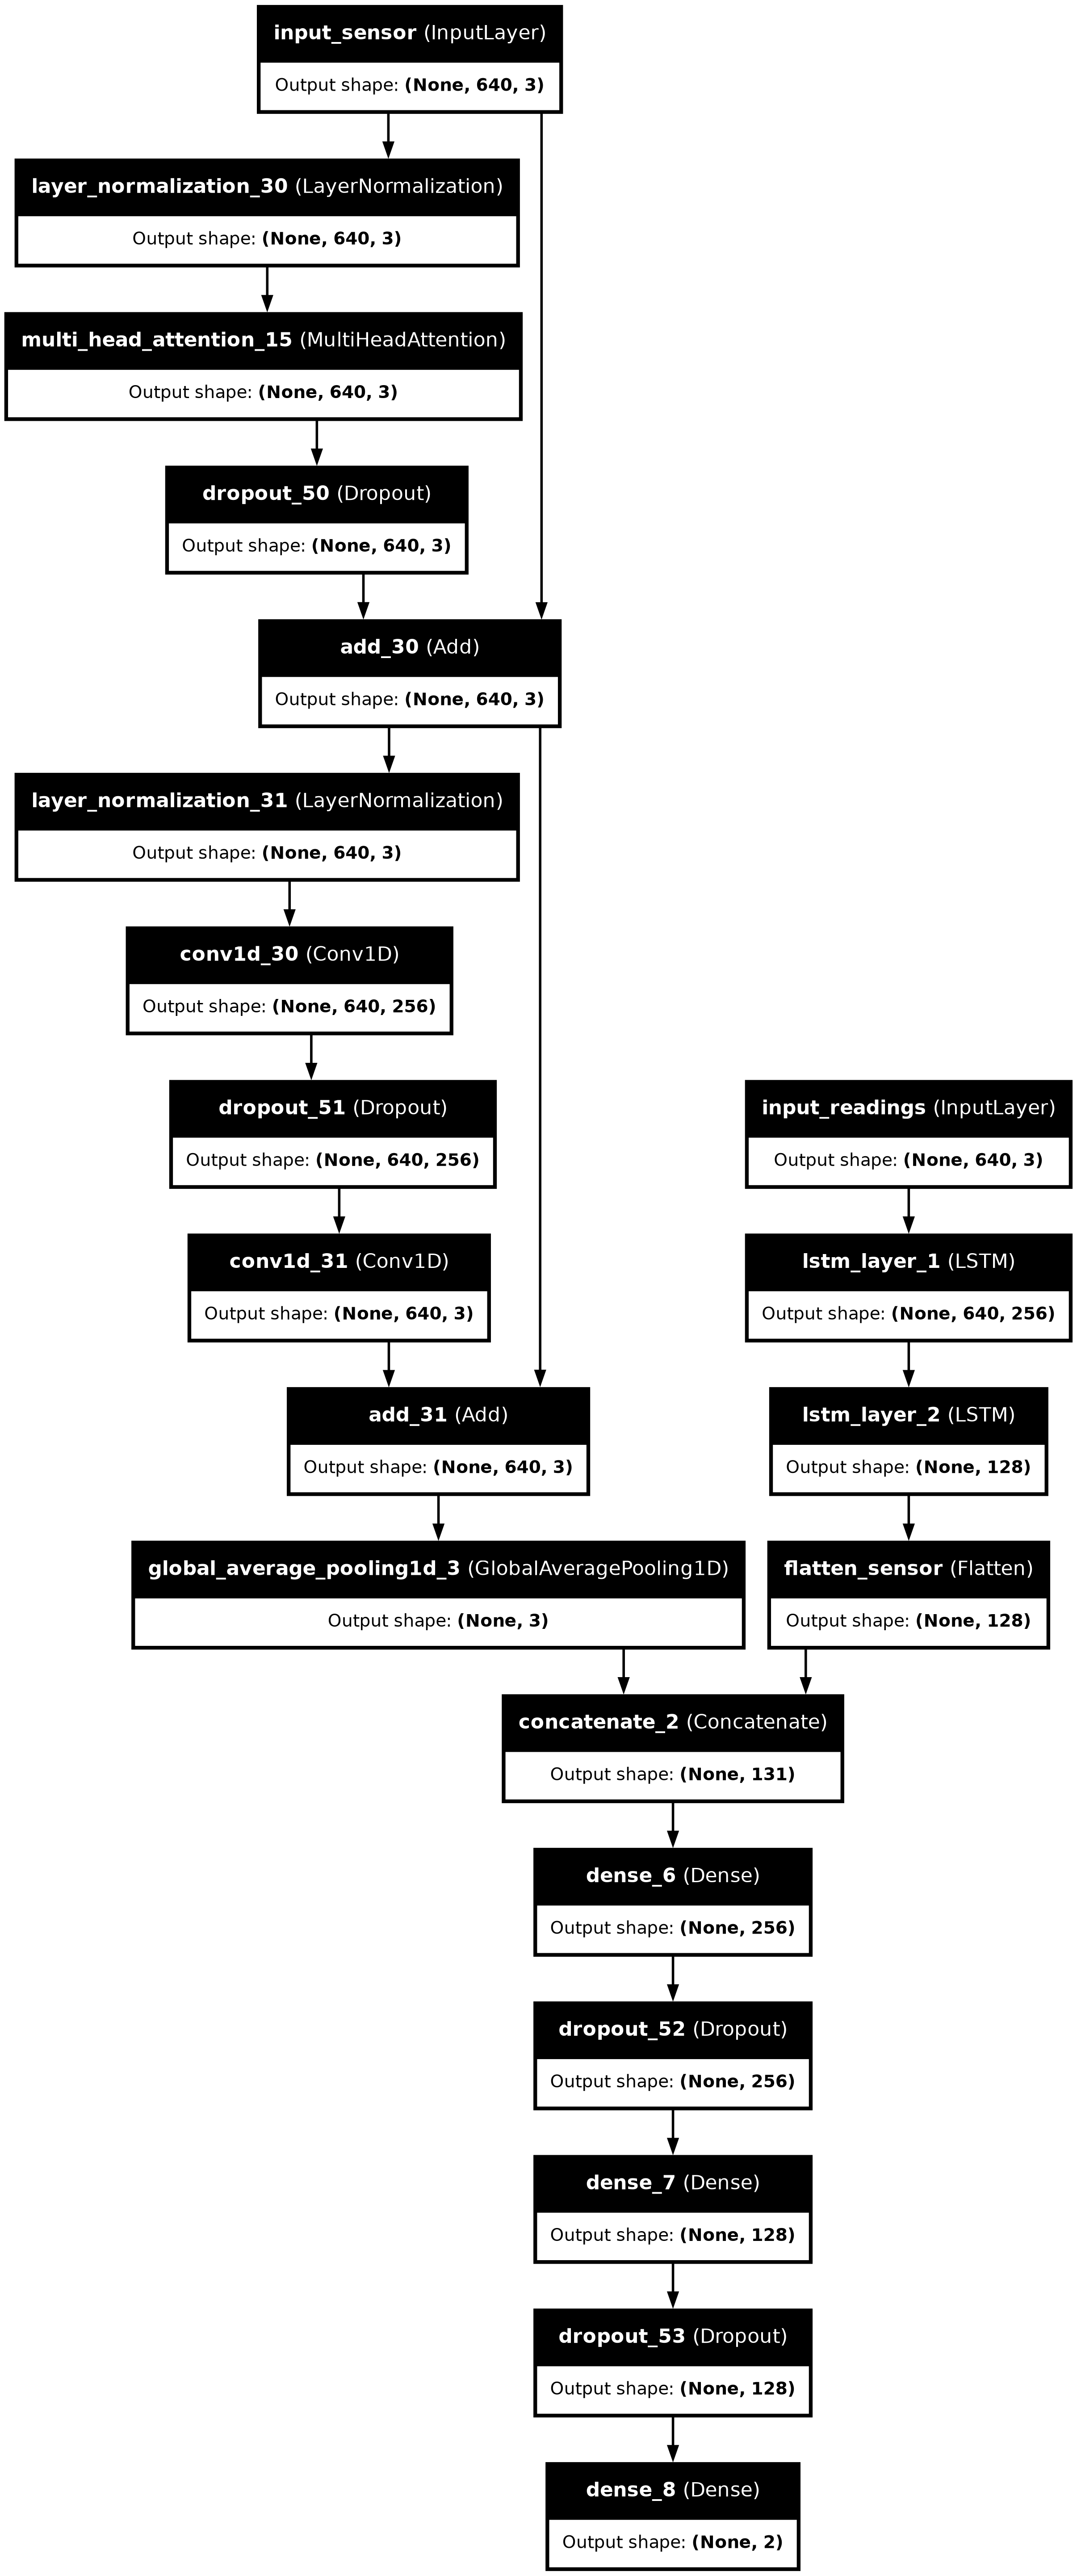

In [57]:
# Build and compile the model
model2 = create_dual_model_with_attention_block(num_classes,window_length, number_of_features,dense_layers=2)

# Display the model summary
model2.summary()
plot_model(model2, to_file=model_name+"_arc2.png", show_shapes=True, show_layer_names=True)


In [58]:
#remove training logs
import shutil

# Specify the path to the directory
directory_path = '/kaggle/working/Logs'

# Remove the directory and its contents
shutil.rmtree(directory_path)


In [59]:
import time
callb=addCallbacks(model_name)
start_time = time.time()
history = model2.fit([x_train1,x_train2],y_train1, epochs=epochs, validation_data=([x_val1,x_val2], y_val2),batch_size = int(batch_size/2),callbacks=callb)
end_time = time.time()
durationt = end_time - start_time
print(durationt)

Epoch 1/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - loss: 1.1390 - recall_2: 1.3999 - val_loss: 0.6713 - val_recall_2: 0.6187 - learning_rate: 0.0010
Epoch 2/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - loss: 1.0113 - recall_2: 1.4972 - val_loss: 0.7205 - val_recall_2: 0.6305 - learning_rate: 0.0010
Epoch 3/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - loss: 0.9812 - recall_2: 1.5228 - val_loss: 0.7153 - val_recall_2: 0.6292 - learning_rate: 0.0010
Epoch 4/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - loss: 0.9852 - recall_2: 1.5223 - val_loss: 0.8494 - val_recall_2: 0.4426 - learning_rate: 0.0010
Epoch 5/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - loss: 0.9739 - recall_2: 1.5328 - val_loss: 0.7669 - val_recall_2: 0.5903 - learning_rate: 0.0010
Epoch 6/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.9874 - recall_2: 1.5393
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
49/49 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - loss: 0.9775 - recall_2: 1.5240 - val

KeyboardInterrupt: 